# Plot Spot

Welcome to the plot spot! In this practical, you'll learn how to visualise data. You will be guided through different types of data visualisations, and compare them against each other. Plotting data in a clear way is an important scientific skill. It helps you gain a better understanding of your own data, and a good plot can be a great addition to any argument.

Staring at the numbers in your dataset won't help anyone, but staring at a figure that summarises the main trends in your data does make it more accessible. However, simplify your data too much, and you might end up obscuring important details. As a scientist (and as a consumer of graphics!), you'll need to find your own optimum on this continuum between detail and clarity.

It is good to be aware of the different types of graph you could use, because each has their own upsides and downsides. Although there are no strict rules, some researchers have strong preferences, and some of those preferences are even grounded in good arguments.

### What's this?

The document before you is a Jupyter Notebook, and it contains embedded Python snippets. Python is a programming language, and Jupyter notebooks are a way to share and explain short bits of code.

### Do I have to learn Python now?

The aim of this practical is not to teach you Python. It would be silly to expect that you could learn a whole language, or even just the basics, in such a short time. Fortunately, Python is quite readable by itself, and you can also use the *comments* to your advantage. You can recognise these by the `#` (pound sign), usually at the start of a line. All text that follows a `#` counts as "comments", and is there purely for human readers. It is highly recommended that you read them to understand the code!

If you are interested in learning Python, there are many online resources. A quick Google with "Python" and your topic/field of choice should help you along. In addition, the experimental psychologists among us could turn to the book [*Python for Experimental Psychologists*](https://www.routledge.com/Python-for-Experimental-Psychologists-1st-Edition/Dalmaijer/p/book/9781138671577) by Dr Edwin Dalmaijer, published by Routledge.

## Getting started...

In Python, you usually start by importing *modules*. Each module offers different functionality, and they are not automatically loaded. (There are so many modules that auto-loading all of them would be a huge waste of time and resources, and also risk conflicts between similar names!)

In [2]:
# We'll import NumPy for it's numerical capabilities.
import numpy
# We'll need Matplotlib's sub-module pyplot to create figures.
from matplotlib import pyplot

## Creating some fake data

Normally, creating fake data is considered to be Very Naughty by the scientific community. However, it can be super helpful if you just want to test a few bits of code!

In [3]:
# Create 1000 x values (sampled from a uniform distribution).
x = numpy.random.rand(1000)
# Create 1000 y values (sampled from a normal distribution).
y = numpy.random.randn(1000)

Now plot the fake data to see what it looks like:

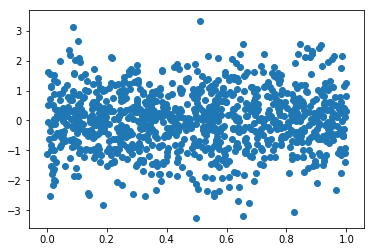

In [5]:
# Create a scatterplot of the x and y values.
pyplot.scatter(x, y)

Just by eye-balling the plot, you can see that there isn't really a relation between `x` and `y`. You can also see that the `x` values are quite uniformly spread between 0 and 1, while the `y` values are concentrated primarily around 0 with a reducing density towards higher and lower values.

This is as expected (because you randomly generated the data to be like this), but let's inspect the data a bit further so that you can be sure that it meets your expectations. One way to do this, is by creating a *histogram*. A histogram counts the number of occurences of values within particular bounds. For example, if you were to set up 10 equally sized *bins* (ranges of values restricted by a left and a right bound) to cover the range 0-1, each bin would be 0.1 wide.

Let's see how this works in practice:

In [6]:
# Create a histogram of the data by using NumPy's "histogram" function.
# Note that this does not produce a plot just yet! You can set the number
# of bins that you would like to divide the data over, and the function
# will then use that to create the bounds for each bin. The function will
# also return the number of observations in each bin.
hist, bin_bounds = numpy.histogram(x, bins=10)

We just allowed NumPy to choose the bin edges, which should generate equal-sized bins. You also have the option to choose the bin edges yourself, or to have them be determined by an algorithm.

Let's see what the bins look like by plotting them in a bar plot. Mind you that the bar plot only needs the left bound of every bin, whereas the `bin_bounds` contains the left bound of every bin AND the right bound of the last bin. You can select all the bounds but the last one by *indexing* or *slicing* the `bin_bounds` variable like this: `bin_bounds[0:-1]`. It means "*From bin_bounds, select all values from position 0 to position -1 (the last position from the end), not inclusive of the end point.*"

Text(0,0.5,u'Number of observations')

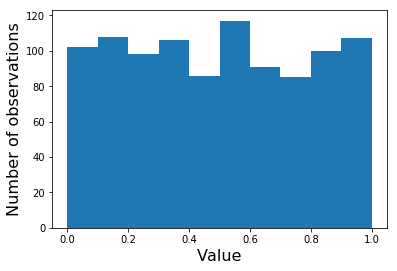

In [7]:
# Plot the bins using pyplot's bar function. We align the plot at the
# left edges, because those are what we obtained from the histogram
# function. The bin width can be set to 0.1 so that the bins touch.
pyplot.bar(bin_bounds[0:-1], hist, align="edge", width=0.1)
# Finish the plot by adding some information on the x and y axes.
pyplot.xlabel("Value", fontsize=16)
pyplot.ylabel("Number of observations", fontsize=16)

It's clear that the `x` values are spread quite uniformaly across the range 0-1. This is good, as it validates our random sampling procedure.

Let's do the same thing for the `y` values...

Text(0,0.5,u'Number of observations')

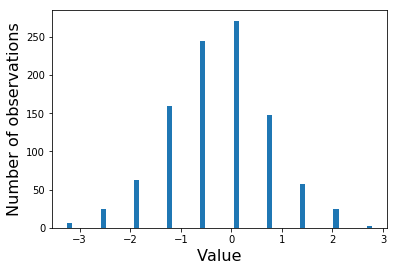

In [8]:
# Create a histogram of the y values.
hist, bin_bounds = numpy.histogram(y, bins=10)
# Plot the bins using pyplot's bar function. We align the plot at the
# left edges, because those are what we obtained from the histogram
# function. The bin width can be set to 0.1 so that the bins touch.
pyplot.bar(bin_bounds[0:-1], hist, align="edge", width=0.1)
# Finish the plot by adding some information on the x and y axes.
pyplot.xlabel("Value", fontsize=16)
pyplot.ylabel("Number of observations", fontsize=16)

Two things immediately stand out: The first point the note is that the `y` values are spread out across a wider range than the `x` values. (This is also why the bars appear thinner.) In addition, the `y` values are more likely to occur around 0. This is because we drew the `y` values from a normal distribution.

# Plotting groups

From this point on, we'll treat the `x` and `y` groups as two different groups. Your objective is to find a way to visualise them in the clearest way possible. Keep in mind that other people are generally interested in knowing two things: 1) What are the characteristics of each group?, and 2) How are the two groups different?

## Bar plot

There's a very high likelihood that you've seen a bar plot before. They're everywhere, from scientific journals to newspapers. Traditionally, bar plots show the mean of each group. In our case, that would look like this:

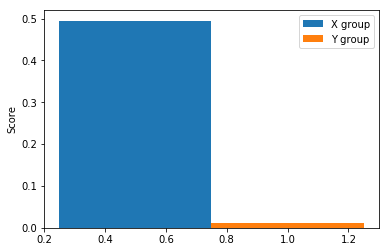

In [16]:
# Compute the mean of the groups.
m_x = numpy.mean(x)
m_y = numpy.mean(y)
# Plot both means in a bar plot. The means will determine the groups position on the y-axis, but the position on the
# x-axis is something we need to set ourselves. Let's just go with 0.5 and 1.
# Plot the mean of the x group.
pyplot.bar(0.5, m_x, width=0.5, label="X group")
# Plot the mean of the y group.
pyplot.bar(1.0, m_y, width=0.5, label="Y group")

# Now finish the plot by adding a sensible y-axis label and a legend.
pyplot.ylabel("Score")
pyplot.legend()

From the current bar plot, it looks like the `x` group is doing very well compared to the `y` group (assuming positive values are better). It also hides that there were any negative values. (Note that the last statement might not entirely be true; sometimes it might randomly happen that the `y` group's average is below 0!)

In reality, there are values in the `y` group that extend beyond the range of the `x` group. Furthermore, the two groups were drawn from different types of distributions. We don't see that in the plot.

## Error bars

One way to improve bar plots is by adding *error bars*. These bars sit atop of the already plotted bars, and usually indicate the standard error of the mean. (You've already learned about this in the previous practicals. As a reminder, it was a measure of how well the sample reflects the population; i.e. how representative of our `x` group is from the group of all X in the world.)

We can compute the standard error by using the formula that you have already seen: Divide the sample standard deviation by the square root of the number of observations in that sample.

In [14]:
# Count the number of observations in each group by taking the length of the x vector.
n_x = len(x)
n_y = len(y)
# Calculate the standard deviations of each group. Note that we are calculating the unbiased standard deviation, i.e.
# the sum of squares divided by (n-1). This is what the ddof value indicates.
sd_x = numpy.std(x, ddof=1)
sd_y = numpy.std(y, ddof=1)
# Calculate the standard error of the mean for both groups.
sem_x = sd_x / numpy.sqrt(n_x)
sem_y = sd_y / numpy.sqrt(n_y)

Now let's use the calculated standard errors to draw error bars into your bar plot. This is almost the same code as before, but mind the `yerr` keyword argument that specifies the error bar size on the y-axis.

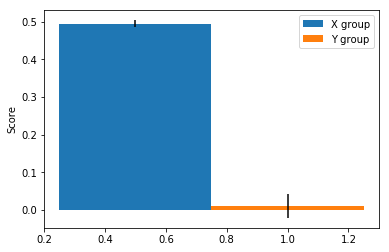

In [18]:
# Plot both means in a bar plot. This is the same code as before, but with the yerr keyword specified.
# Plot the mean of the x group.
pyplot.bar(0.5, m_x, yerr=sem_x, width=0.5, label="X group")
# Plot the mean of the y group.
pyplot.bar(1.0, m_y, yerr=sem_y, width=0.5, label="Y group")

# Now finish the plot by adding a sensible y-axis label and a legend.
pyplot.ylabel("Score")
pyplot.legend()

Now, as you are aware, the standard error of the mean indicates how well the sample mean represents the population mean. It's a measure that reflects something about your sampling process, not necessarily about what your data looks like. The plot above thus shows that the two groups might well differ in what their means are, but it doesn't teach you much else.

One thing you can do, is use error bars to plot the standard deviation:

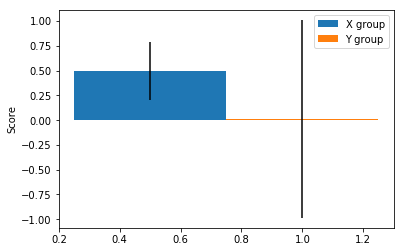

In [19]:
# Plot both means in a bar plot. This is the same code as before, but now the yerr represents the standard deviation.
# Plot the mean of the x group.
pyplot.bar(0.5, m_x, yerr=sd_x, width=0.5, label="X group")
# Plot the mean of the y group.
pyplot.bar(1.0, m_y, yerr=sd_y, width=0.5, label="Y group")

# Now finish the plot by adding a sensible y-axis label and a legend.
pyplot.ylabel("Score")
pyplot.legend()

In this plot, it's a bit clearer what the distributions of both groups look like. But it's not pretty... It's quite unclear why the bars are there in the first place, as the only thing they indicate is how far from 0 a group's mean is. In addition, although the standard deviation gives some indication of the spread of each group, we don't quite see what the exact distributions look like: it's just a black line...

## Are bar plots really that bad?

If you haven't seen a lot of datasets, you might not appreciate how summary statistics (mean, median, standard deviation, etcetera) can be misleading. To illustrate just how different datasets can be while having the exact same mean, median, standard deviation, and correlation, please have a look at Alberto Cairo's datasaurus, and a [dozen extremely different plots](https://www.autodeskresearch.com/publications/samestats) that all have the exact same summary statistics:

![](datasaurus_alberto_cairo.png)

This is why it's important to be aware of the underlying distribution of data, and to not simply rely on summary statistics. Bar plots only show summary statistics, and can thus hide potentially important differences between groups.

## Box plot

One type of plot that *does* reflect properties of distributions is the box plot, or box-and-whiskers plot. It quite literally is two stacked boxes with whiskers on either side. Each element of the plot represents a quartile of the data (that's 25% of the observations). This type of plot thus tells you about each group's median (the 50% percentile lies between the second and third quartile), and gives you a rough idea of what the distribution looks like. Some boxplots also include 'fliers': Values that lie outside the typical range, and could be outliers.

Let's draw box plots for our two groups:

{'boxes': [<matplotlib.lines.Line2D at 0x7f299b455210>,
 'caps': [<matplotlib.lines.Line2D at 0x7f299b455a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f299b4605d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f299b460210>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f299b4552d0>,
  <matplotlib.lines.Line2D at 0x7f299b46c150>]}

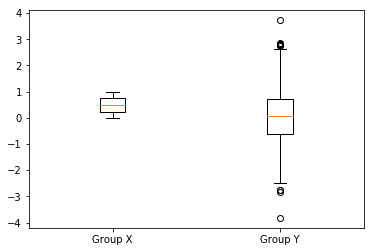

In [7]:
# Draw a box for values from group x and group y. You can pass both variables at the same time by combining them
# into a list, i.e. as [x,y]. The same is true for the labels you would like to associate with the groups.
pyplot.boxplot([x,y], labels=["Group X","Group Y"])

This is a pretty good visualisation of the two groups. We can see their central tendency, because the median is represented by the coloured horizontal line. In addition, we can see how observations are spread out. For group `x`, all quartiles are roughly equally big, which demonstrates that the data is uniformly distributed. For group `y`, we can see that the second and third quartile (the boxes) are smaller than the first and fourth quartile (the whiskers). This illustrates that the distribution is denser around the median.

What we still can't see from the current plot is what the shape of the distribution is. For example, it seems like group `y` is a normal distribution, but it could also be that all values within the second and third quartile are the same. For example, they could all be -0.5 and 0.5, and it would result in the same box plot.

## Violin plot

Where box plots do not typically reveal the exact shape of a distribution, violin plots are designed to do exactly that. They apply a *kernel density estimate* to characterise the shape of a distribution, and plot that instead of boxes and whiskers. Fliers are still denoted with a different marker (although what is considered a "flier" can differ between box plots and violin plots, or more accurately, per what standards are set within the function to draw the plots).

Let's see what a violin plot of our two groups would look like:

{u'bodies': [<matplotlib.collections.PolyCollection at 0x7f299b0b3750>,
 u'cbars': <matplotlib.collections.LineCollection at 0x7f299b0c0590>,
 u'cmaxes': <matplotlib.collections.LineCollection at 0x7f299b0b3ed0>,
 u'cmeans': <matplotlib.collections.LineCollection at 0x7f299b0b3590>,
 u'cmins': <matplotlib.collections.LineCollection at 0x7f299b0c0250>}

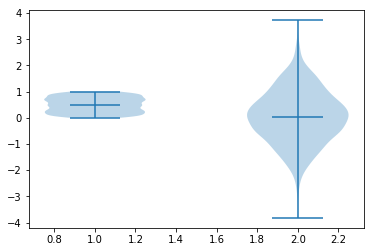

In [17]:
# Draw a violin plot for values from group x and group y. As with the box plot, you can pass both
# variables at the same time by combining them into a list, i.e. as [x,y].
pyplot.violinplot([x,y], showmeans=True)

As you can see, the violin plot gives a much clearer picture of the actual distribution of your data.

# Choosing a visualisation type

As you have seen, different types of data visualisations exist, and each come with their own benefits and downsides. Bar plots can be easily understood, but also give you very little information about what the data underlying an average looks like. In addition, whether or not it makes sense to draw a bar highly depends on what kind of data you're visualising. Adding error bars to bar plots to indicate the standard error of the mean tells you something about the sampling process, whereas adding error bars to indicate the standard deviation tells you something about the sample.

If you're interested in visualising distributions in a more detailed way, you could turn to box or violin plots. These provide a clearer picture of what your data look like, and are still quite easy to interpret.

What the best type of plot is depends on the data, and on what message you would like your graph to illustrate. If you're simply saying "these groups have different means", a bar plot with error bars that indicate the standard error of the mean could work very well. However, if you're trying to illustrate that two groups are from distributions with different properties, you might need to turn to box or violin plots.

Finally, you are free to combine plots and types of visualisations. For example, you could simply throw everything into one combined plot:

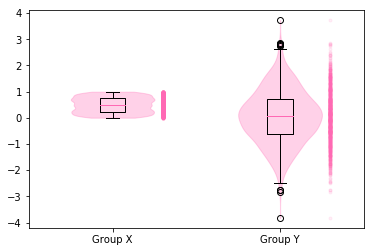

In [26]:
# Determine the positions of the two groups' visualisations on the x-axis.
pos = [0.5, 1.5]

# Draw violin plots for each group, but don't draw the mean, median, or extrema.
vplot = pyplot.violinplot([x,y], positions=pos, showmeans=False, showmedians=False, showextrema=False)
# Set the colour of the violin plot.
for violin in vplot["bodies"]:
    violin.set_color("#FF69B4")
# Draw box plots for each groups on the same positions.
bplot = pyplot.boxplot([x,y], positions=pos, labels=["Group X", "Group Y"])
# Set the colour of horizontal lines that indicate the median in each box plot.
for line in bplot["medians"]:
    line.set_color("#FF69B4")

# Finally, draw the individual data points for each group. The points need
# to be plotted to the right of each of the box/violin plots. To do so, we
# first need to create two vectors that code for the position of each sample
# from each group on the x-axis.
x_pos = numpy.ones(x.shape) * pos[0] + 0.3
y_pos = numpy.ones(y.shape) * pos[1] + 0.3
# Then, we simply need to plot the samples. The alpha keyword indicates the
# transparancy of each sample.
pyplot.plot(x_pos, x, '.', color="#FF69B4", alpha=0.1)
pyplot.plot(y_pos, y, '.', color="#FF69B4", alpha=0.1)